# Numerical Solution to the Van der Pol Oscillator
Raihaan Usman, UROP Student

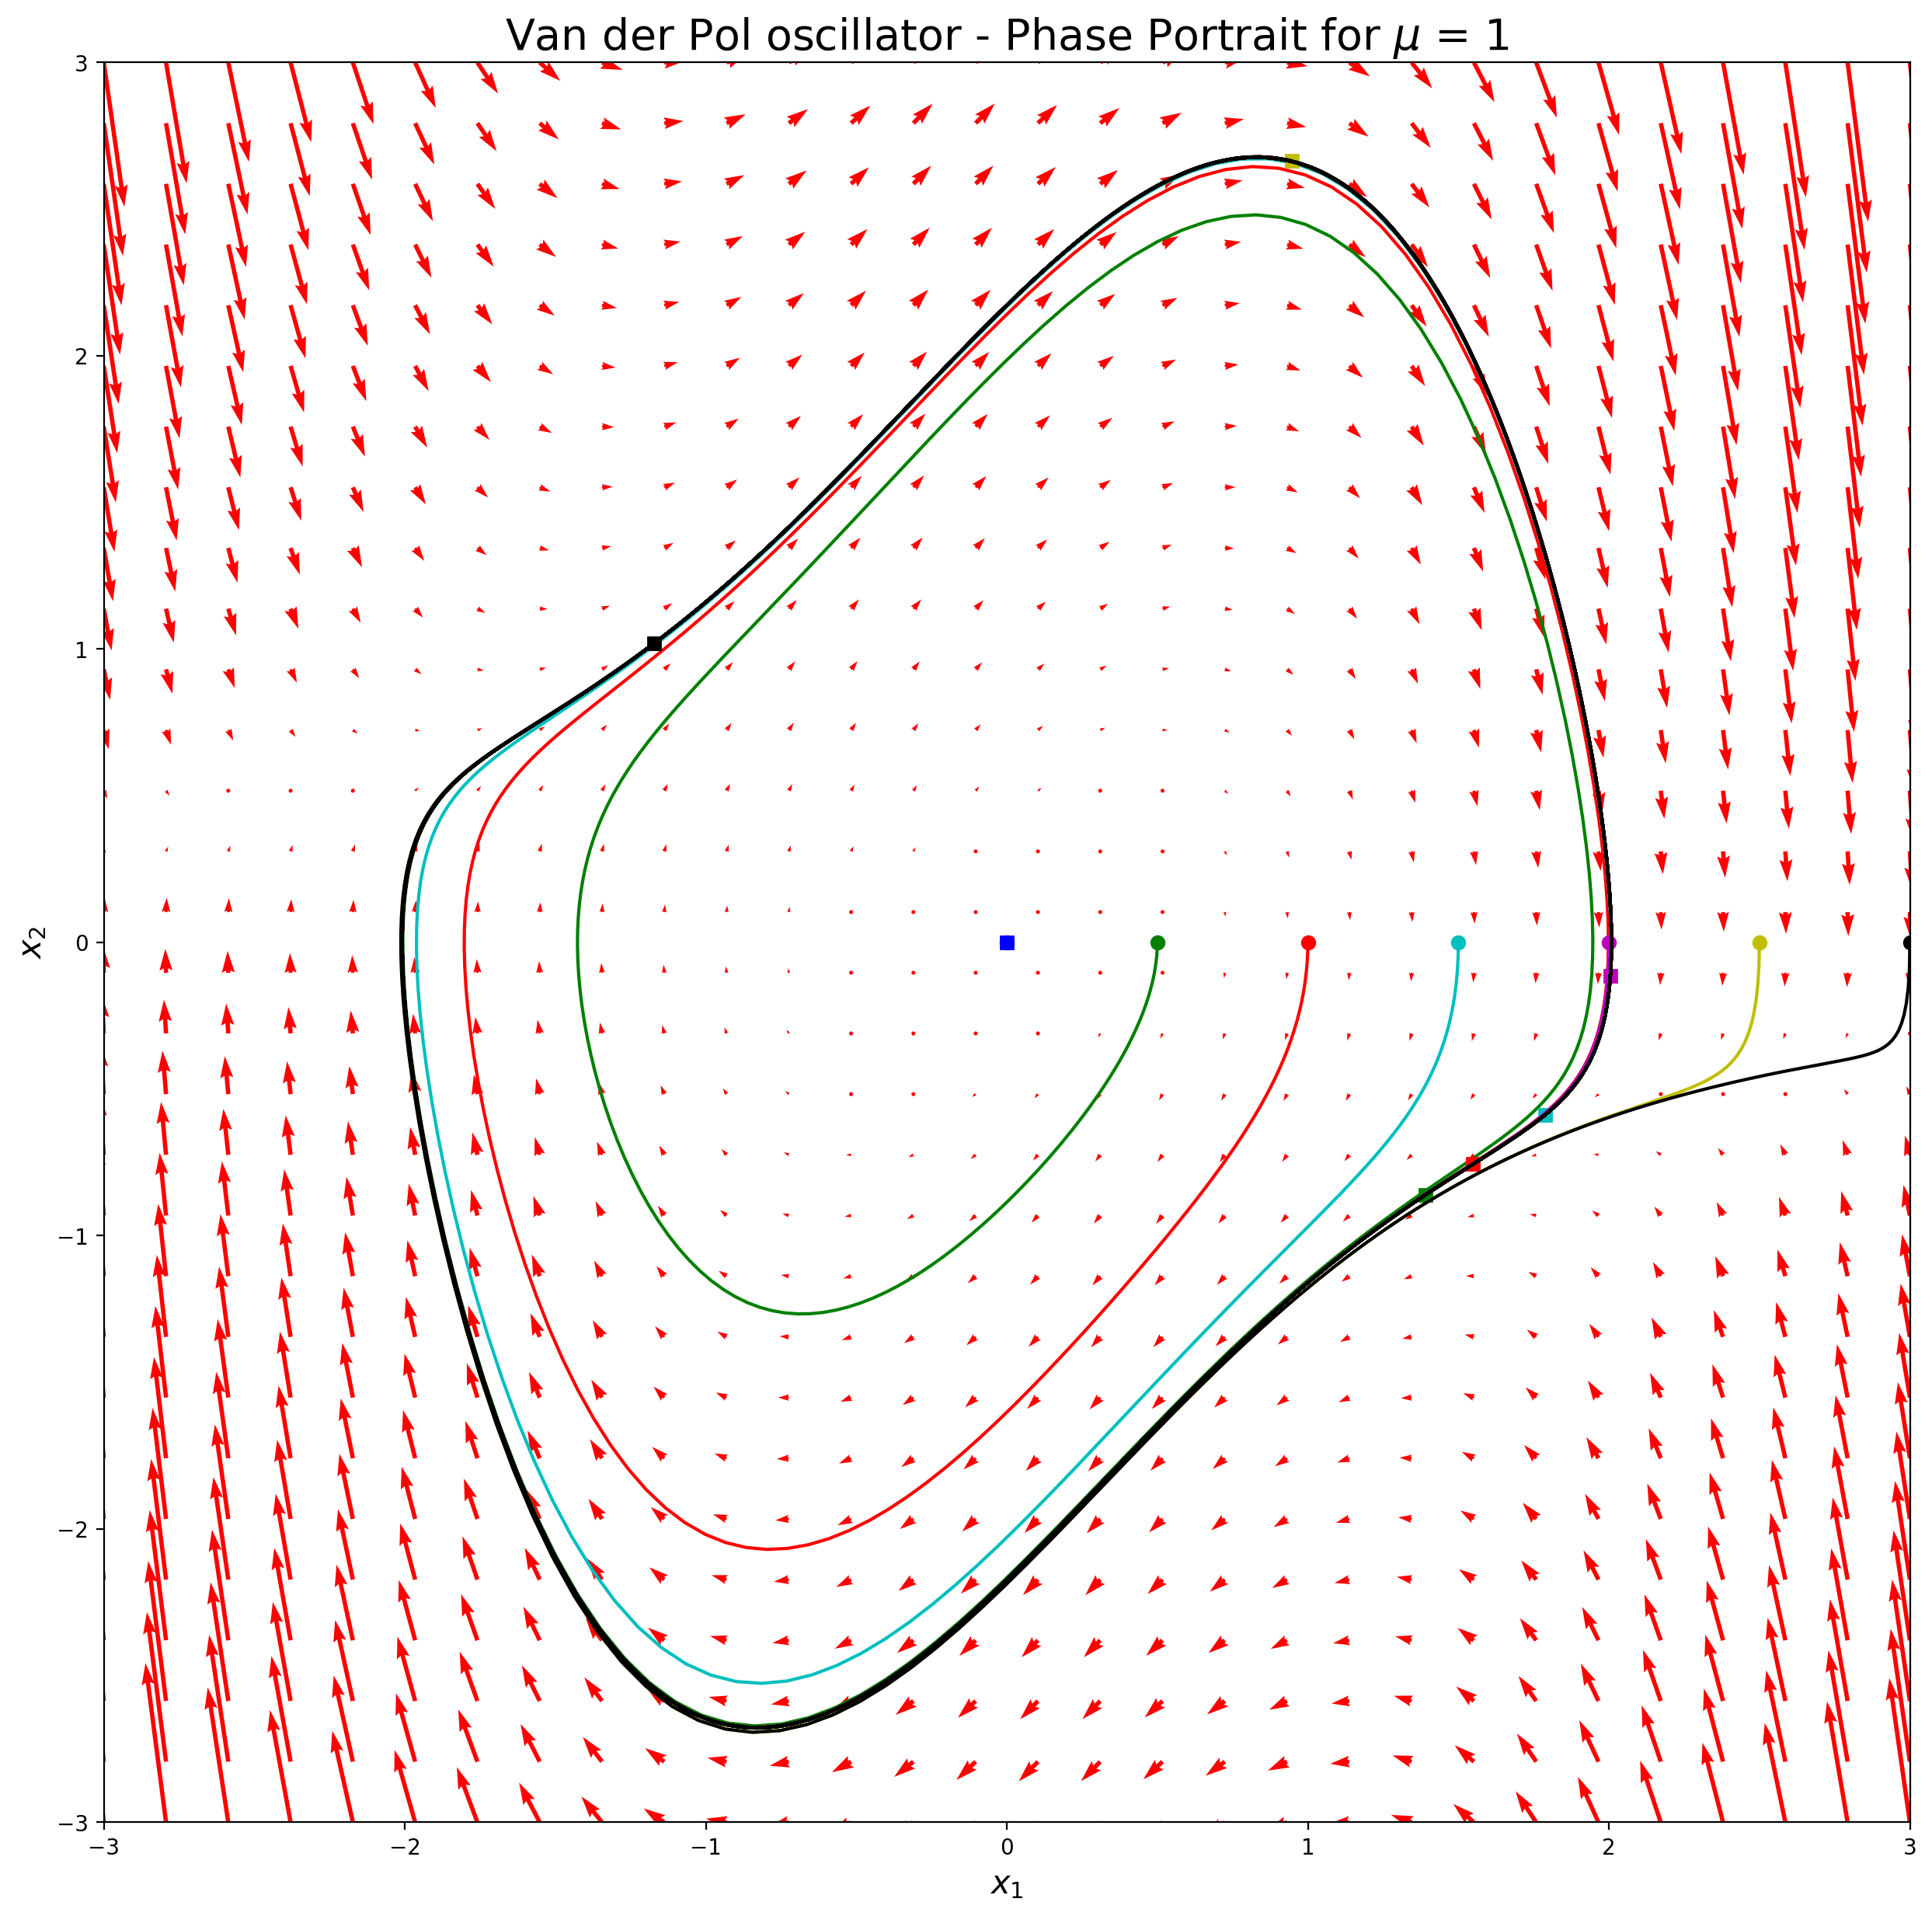

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Damping coefficient mu
mu = 1

# Function for VdP oscillator
X_dot = lambda X, t: np.array([X[1], mu*(1-X[0]**2)*X[1]-X[0]])

'''
Phase portrait of the VdP oscillator
'''

# Generating solution mesh
lim = 3
ax1 = np.linspace(-lim, lim, 30)
ax2 = np.linspace(-lim, lim, 30)

AX1, AX2 = np.meshgrid(ax1, ax2)

# These hold the solutions
x1, x2 = np.zeros(AX1.shape), np.zeros(AX2.shape)

NI, NJ = AX1.shape

for i in range(NI):
    for j in range(NJ):
        x = AX1[i, j]
        y = AX2[i, j]
        xprime = X_dot([x, y], 0)
        x1[i,j] = xprime[0]
        x2[i,j] = xprime[1]

# Creating figure with matplotlib
fig = plt.figure(figsize=(15,15), dpi=200)
fig.patch.set_facecolor('white')
plt.quiver(AX1, AX2, x1, x2, color='r')

plt.title(f"Van der Pol oscillator - Phase Portrait for $\mu$ = {mu}", fontsize=20)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.xlim([-lim, lim])
plt.ylim([-lim, lim])

'''
Particular solution for the VdP oscillator for some initial conditions
'''

# Time vector
t = np.linspace(0, 100, 3000)

# List of matplotlib colors
col = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

# Family of initial conditions
for i, X0_1 in enumerate([0, 0.5, 1, 1.5, 2, 2.5, 3]):
    
    # Initial conditions
    X0 = np.array([X0_1, 0])
    
    # Solving ODE system using LSODA
    x = odeint(X_dot, X0, t)
    
    plt.plot(x[:,0], x[:,1], linestyle='-', color=col[i])           # Path
    plt.plot([x[0,0]], [x[0,1]], marker='o', color=col[i])          # Start
    plt.plot([x[-1,0]], [x[-1,1]], marker='s', color=col[i])        # End

# Make the title and labels have a white opaque background

plt.savefig('Figures/phase-portrait.png', bbox_inches='tight')

Success! Note the limit cycle and how its shape changes with the damping parameter $\mu$.